> **Disclaimer:** This notebook is not final and may contain non-finnished explanations, broken links, etc.

Recent years were very fruitful in terms of new deep learning architectures. In this notebook we have a small collection of such ideas.

> **Note:** In order to understand this tutorial, the reader should be familiar with the basics of deep learning and keras. If you are not familiar with that, then you can read about it in our tutorial about [Neural networks](https://drive.google.com/drive/folders/10xbPzfkPw6CcFc4Sxh34TKMq-B_modhI?usp=sharing) and [Deep learning basics with keras](https://drive.google.com/drive/folders/13V9Ha-O0effvwf5qWout0YjMPqfmYpdj?usp=sharing).

> **Note:** This notebook uses keras, which may utilize GPUs to speed-up computations by HW parallelization. If you are running this notebbok on an external platforms which enables GPU (e.g. Google Colab or Kaggle), this is the right time to activate them.

> **Credit:** Thank you, **Dror Geva**, for this wonderful collection.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical
from keras.optimizers import Adam, Adadelta
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.losses import categorical_crossentropy

# random seeds must be set before importing keras & tensorflow
my_seed = 512
np.random.seed(my_seed)
import random 
random.seed(my_seed)

from IPython.display import Image
from IPython.core.display import HTML 

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/NayaCollege GitHub/Data-Scientist-Essentials/04 - Miscellaneous and applications/01 - Deep learning and friends/03 - Deep learning architectures/'

# CNN (Convulotional Neural Networks)

## Idea and basic concepts

CNNs are architectures with convolutional layers. Convolutional layers are pre-made layers which apply a specific set of weights. This set of weights is called a **filter**, and it has several advantages:
* It is local (with given **kernel size** and **stride**)
* It has specific meaning (especially in CV applications)

It takes time to grasp the idea of convolution, and the following full computed visualization from Wikimedia is very helpful.

![](https://upload.wikimedia.org/wikipedia/commons/4/4f/3D_Convolution_Animation.gif)

> **Note:** The idea of convolutional filtering of an image dates back to the 1960's, and it is a basic operation in classical CV.

It is helpful to think of CNNs as made of two parts - feature learning part and prediction part. This is illustrated in the following images, which show standard CNN architectures.

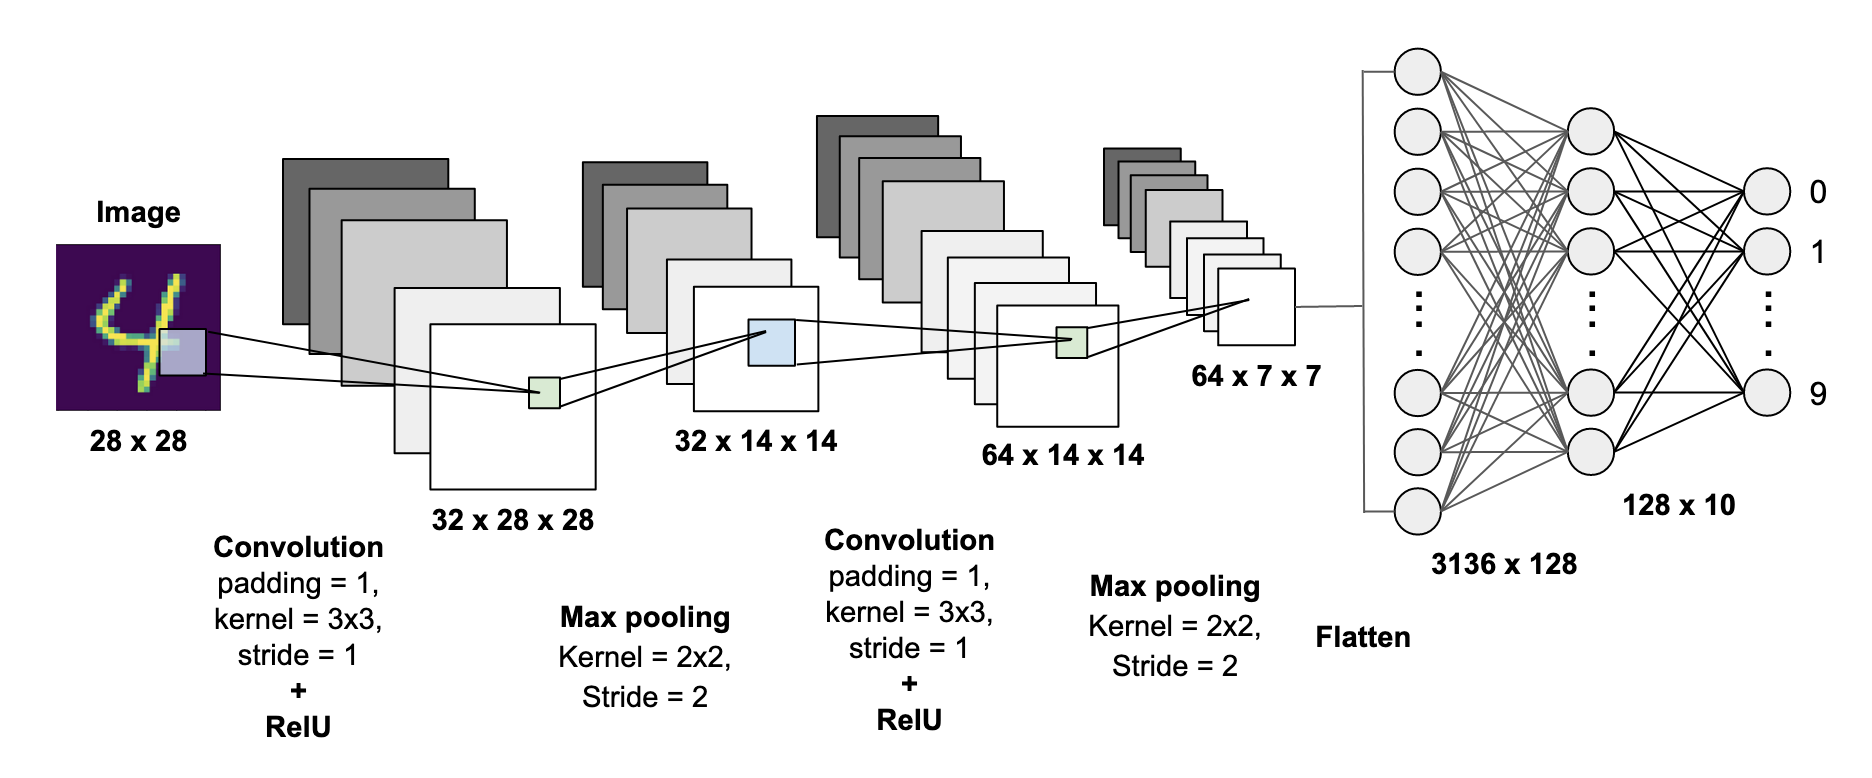

In [0]:
Image(filename=path+'mnist_conv.png', width=1000)

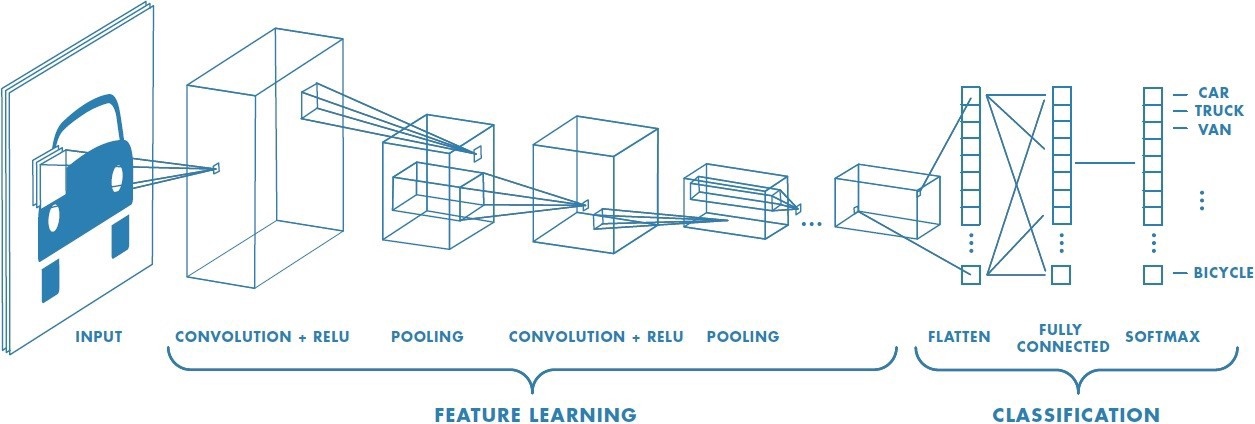

In [0]:
Image(filename=path+'general_cnn.jpeg', width=1000)

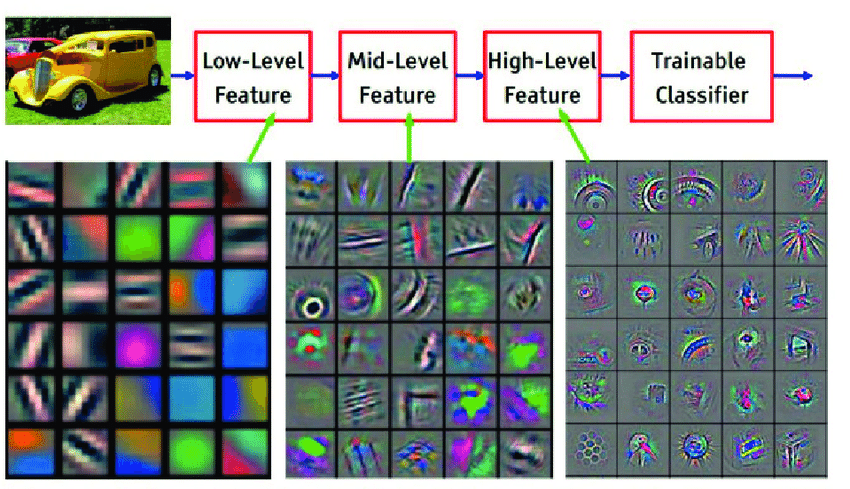

In [0]:
Image(filename=path+'example_of_conv_layers.png', width=1000)

### Filters

Here are some examples of filters (called kernels) applied in mnist images:

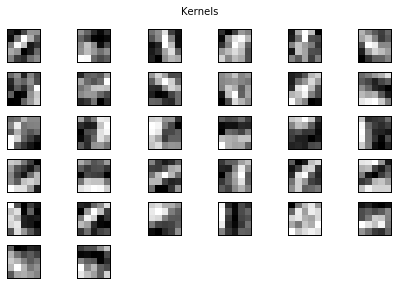

In [0]:
Image(filename=path+'mnist_kernels.png', width=500)

### Max Pooling

Max pooling (and other pooling logics) is a simple method for dimensionality reduction based on local data manipulations.

> **Reference:** Short illustration in [this Quora answer](https://qr.ae/TzNLbd).

## Example (MNIST)


Solving MNIST classification using CNN ([Based on this example in keras docs](https://keras.io/examples/mnist_cnn/))

### The data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


In [0]:
img_rows, img_cols = 28, 28
num_classes = 10

Convolutional layers require a 4-dimensional input, where the first layer is for the different images, the second and third are the width and height of the images, and the fourth is for the color data (called channels).

In [0]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

Next, we apply some preprocesses to the data

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
X_train /= 255
X_test /= 255

MNIST is a classification problem, so we use the `to_categorical()` to convert the target.

In [0]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### The model

In [0]:
model = Sequential()

We add a convolutional layer ([`Conv2D`](https://keras.io/layers/convolutional/#conv2d)) of 32 filters of size 3-by-3. 

In [0]:
model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))

> **Discussion:** What is the input and output size? `padding='valid'` is the default.

> **Discussion:** How many filters do we need? What is their size?

> **Note:** Layers and filters have many hyper-parameters, but they are rarely changed.

Next we add another convolutional layer with even more filters.

In [0]:
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu'))

In [0]:


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, 
                activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

### Fitting

In [0]:
batch_size = 128
epochs = 12

In [0]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.2750 - acc: 0.9145 - val_loss: 0.0582 - val_acc: 0.9811
Epoch 2/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0868 - acc: 0.9744 - val_loss: 0.0382 - val_acc: 0.9866
Epoch 3/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0649 - acc: 0.9811 - val_loss: 0.0335 - val_acc: 0.9890
Epoch 4/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0535 - acc: 0.9843 - val_loss: 0.0307 - val_acc: 0.9894
Epoch 5/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0458 - acc: 0.9863 - val_loss: 0.0290 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 4s 73us/step - loss: 0.0398 - acc: 0.9878 - val_loss: 0.0272 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0368 - acc: 0.9890 - val_loss: 0.0264 - val_acc

### Validation

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026074563779283563
Test accuracy: 0.9921


# Autoencoder

## Idea and basic concepts

An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”.

In this demo we show how to reduce the dimensionality of the MNIST dataset.

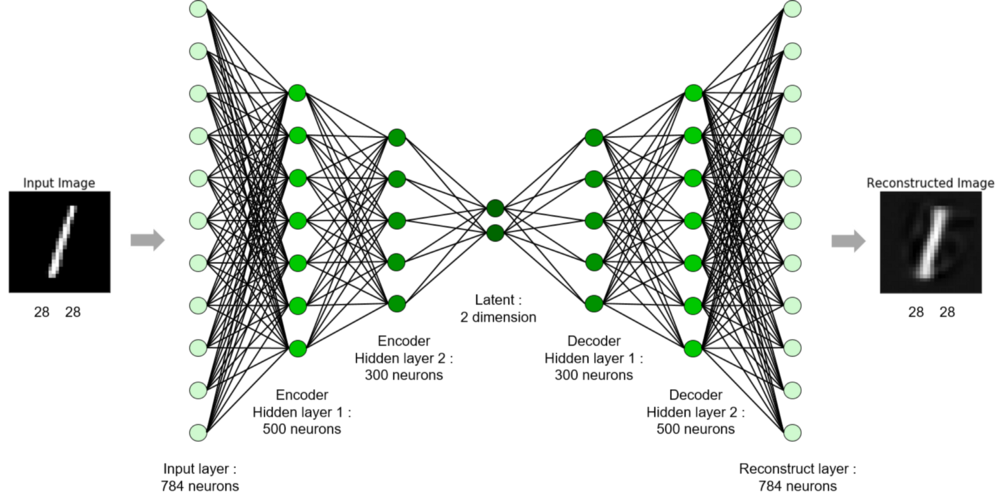

In [0]:
Image(filename=path+'auto_encoder.png', width=1000)

## Example (MNIST)

### The data

Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

> **Note:** We don't need `y_train` and `y_test` for this example, but we define it for later examples.

Next, we apply some preprocesses to the data

> **Note:** This example demonstrates building autoencoders with dense layers, so the input is flattened at an early stage. This is different than how we do it with CNNs. Keeping an eye for the dimensions is important in DL, so be aware of this difference.

In [0]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)
print(X_train.shape)

(60000, 784)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
X_train /= 255
X_test /= 255

### Building the model

We choose the dimensionality of the encoding.

In [0]:
input_dim = 784
encoding_dim = 32  

This time we will use `Model` object (and not `Sequental`).


In [0]:
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, 
                activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', 
                    loss='binary_crossentropy')

In [0]:
autoencoder.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 8)           0  

### Training

Now let's train our autoencoder for 50 epochs:

In [0]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.3595 - val_loss: 0.2713
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2646 - val_loss: 0.2541
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2435 - val_loss: 0.2306
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2228 - val_loss: 0.2129
Epoch 5/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2079 - val_loss: 0.2006
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1974 - val_loss: 0.1917
Epoch 7/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1892 - val_loss: 0.1842
Epoch 8/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1823 - val_loss: 0.1779
Epoch 9/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1763 - val_loss: 0.1724
Epoch

### Illustration

In [0]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
encoded_imgs = encoder.predict(X_test)

In [0]:
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoded_imgs = decoder.predict(encoded_imgs)

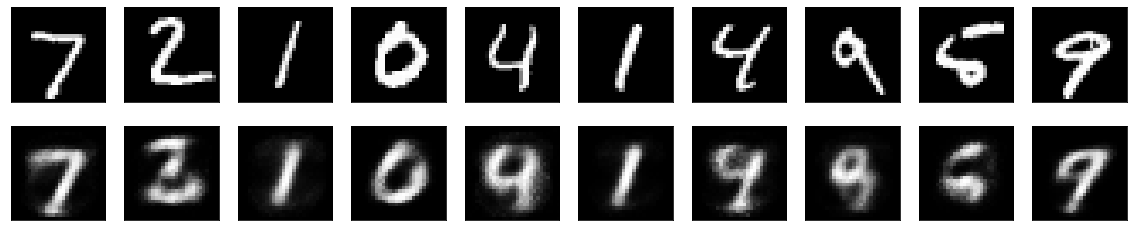

In [0]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Example 2

Building convolutional auto encoder on mnist dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
autoencoder.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 8)           0  

In [0]:
# note that we take them from the *test* set
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

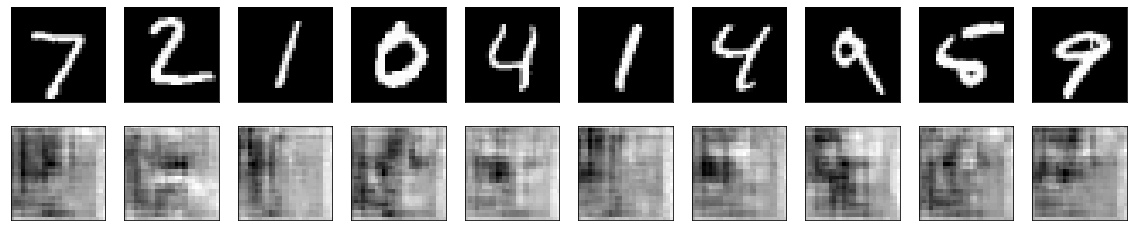

In [0]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Loss has improved as compared to the Dense Auto encoder we built earlyer!

## Example 3

Noise filtering using autoencoders

In [0]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

# Lets create noisy digits
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

Here's what the noisy digits look like:

In [0]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
autoencoder.fit(X_train_noisy, X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy, X_test))

Due to very long time training without GPU (about 3.5 hours...), I stopped the learning process :) . This is the result, If you will let it go till the end:

In [0]:
Image(filename='denoised_digits.png')

# Recurrent Neural Network

## Idea and basic concepts

### Vanila RNN

[RNNs](https://en.wikipedia.org/wiki/Recurrent_neural_network) are architectures with recurrent layers, which means their output is also a part of their input (with some delay, of course). This characteristic gives the network some kind of temporal behavior, so RNNs can use their internal state (memory) to process variable length sequences of inputs.

In [0]:
Image(filename='vanila_rnn.jpeg', width=1000)

In [0]:
Image(filename='rnn_cell.png', width=1000)

In [0]:
Image(filename=path+'tanh.png')

### GRU architecture (Gated recurrent unit)

In [0]:
Image(filename=path+'gru_cell.jpeg', width=1000)

### LSTM architecture (Long Short Term Memory)

> **Reference:** [Great article about the ideas behind LSTM by Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

In [0]:
Image(filename=path+'lstm-cell.png', width=1000)

In [0]:
Image(filename=path+'lstm_cell_details.jpeg', width=1000)

## Example 

building LSTM with keras for predicting sentiment for movie reviews

Word embeddings

Representing words by vectors of numbers.  we can decide what will be the dimentionality that represent a word

In [0]:
Image(filename=path+'embeddings.png', width=1000)

familiar leared embeddings:

* Word2Vec - https://pathmind.com/wiki/word2vec
* Glove    -  https://nlp.stanford.edu/projects/glove/

In [0]:
plt.style.use('dark_background')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

[link to the dataset in kaggle](https://www.kaggle.com/c/movie-review-sentiment-analysis-kernels-only)

In [0]:
df_train = pd.read_csv(path+'train.tsv', sep='\t')
print('train set: {0}'.format(df_train.shape))
df_train.head(10)

In [0]:
#Target distibuition (5 classes)
df_train.Sentiment.value_counts()

In [0]:
shortcuts_map_list = {r"i'm": 'i am',
                      r"'re": ' are',
                      r"let’s": 'let us',
                      r"'s":  ' is',
                      r"'ve": ' have',
                      r"can't": 'can not',
                      r"cannot": 'can not',
                      r"shan’t": 'shall not',
                      r"n't": ' not',
                      r"'d": ' would',
                      r"'ll": ' will',
                      r"'scuse": 'excuse',
                      ',': ' ,',
                      '.': ' .',
                      '!': ' !',
                      '?': ' ?',
                      '\s+': ' '}

def change_shotrcuts(text):
    text = text.lower()
    for s in shortcuts_map_list:
        text = text.replace(s, shortcuts_map_list[s])
    text = ' '.join(text.split())
    return text

In [0]:
X_train = df_train['Phrase'].apply(lambda p: change_shotrcuts(p))

In [0]:
y_train = df_train['Sentiment']

In [0]:
# calculate the lenght of each sentence and find the masx len
phrase_len = X_train.apply(lambda p: len(p.split(' ')))
max_phrase_len = phrase_len.max()
max_phrase_len

In [0]:
max_words = 8192
tokenizer = Tokenizer(
                      num_words = max_words,
                      filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
                     )
tokenizer.fit_on_texts(X_train)  # Learn tokens form string
X_train = tokenizer.texts_to_sequences(X_train) ## Change each row to be a sequnce of numbers (numbers represent the words)
X_train = pad_sequences(X_train, maxlen = max_phrase_len) # add a specifiec token that reserved for padding for 
                                                          # each sentnce to be in the same length - the maxmial length. 
y_train = to_categorical(y_train) # One hot encode y (represnted by vector of 5)

In [0]:
# We have 15,306 unique tokens in our data and 8,192 unique words kept in our tokenizer
print(len(tokenizer.word_counts))
print(tokenizer.num_words)

In [0]:
# lets look how it looks like:
list(tokenizer.index_word.items())[0:30]

In [0]:
print(X_train[0].shape)
print(X_train[0])

In [0]:
print(X_train[100].shape)
print(X_train[100])

In [0]:
batch_size = 512
epochs = 8

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len)) # Here we create out own word embeddings
                                                                                                  # with dimentionaly of 256)
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm.add(Dense(256, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(5, activation = 'softmax'))
model_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [0]:
history = model_lstm.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 8,
    batch_size = 512
)

In [0]:
model.metrics_names

In [0]:
print('loss: {}, accuracy: {}'.format(*(model_lstm.evaluate(X_train[::20],y_train[::20]))))

# Generative Adversarial Networks (GAN)

In [0]:
Image(filename='gan_architecture.png')

### Very nice link about applications of GAN:
___https://medium.com/@jonathan_hui/gan-some-cool-applications-of-gans-4c9ecca35900___

# Image Net Project:
___https://en.wikipedia.org/wiki/ImageNet___

# Architectures of familiar nets:

In [0]:
Image(filename='vgg16.png')

In [0]:
Image(filename='resnet_vgg.png')

## Here is some intuition about what is going on in the conv layers:
Think what if we cloud take the model that has learned and trained for lots of hours and just tune it to a different task? 
#### This is called trasfer learning!